In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from tf_vgg import kaggle_data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import random
from math import exp
from itertools import izip, islice
import matplotlib.pyplot as plt

import xgboost as xgb


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(60, 7, 7, 512)
0


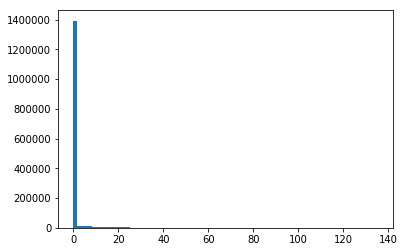

In [2]:
lungs = kaggle_data.get_training_lungs()
features = kaggle_data.get_training_vgg_features()
labels = kaggle_data.get_training_lung_labels()

for (tup, name),label in izip(features, labels):
    print tup.shape
    print label
    plt.hist(tup.flatten(), bins=80)
    plt.show()
    break

In [5]:
param = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'eval_metric': 'auc'
}

def strip_names(iterator):
    for i, name in iterator:
        yield i
        
# hacky but it works
data_len = 1396
        
features_np = np.empty((data_len, 60, 7, 7, 512), dtype=np.float32)
labels_np = np.empty((data_len,), dtype=np.int32)
for i, lung_features in enumerate(strip_names(features)):
    features_np[i] = lung_features
for i, label in enumerate(labels):
    labels_np[i] = label
print features_np.shape
features_np = features_np.reshape(features_np.shape[0], reduce(lambda a,b: a*b, features_np.shape[1:]))

dtrain = xgb.DMatrix(features_np[:500], label=labels_np[:500])
dvalidate = xgb.DMatrix(features_np[500:600], label=labels_np[500:600])

(1396, 60, 7, 7, 512)


In [6]:
num_round = 10

evallist = [(dvalidate, 'eval'), (dtrain, 'train')]

bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.583851	train-auc:0.993333
[1]	eval-auc:0.519198	train-auc:0.999978
[2]	eval-auc:0.566629	train-auc:1
[3]	eval-auc:0.600508	train-auc:1
[4]	eval-auc:0.611519	train-auc:1
[5]	eval-auc:0.627329	train-auc:1
[6]	eval-auc:0.58498	train-auc:1
[7]	eval-auc:0.571993	train-auc:1
[8]	eval-auc:0.625071	train-auc:1
[9]	eval-auc:0.639187	train-auc:1
